# PyTorch Intro
This is a simple exercise that introduces the basics of PyTorch.

<a target="_blank" href="https://colab.research.google.com/github/PrzemekSekula/ReinforcementLearningClasses/blob/main/PyTorchIntro/PyTorchIntro-solved.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>

In [1]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PrzemekSekula/ReinforcementLearningClasses/main/PyTorchIntro/data.csv')   
df.head()

,area,crime_rate,metro_proximity,price
0,127,4.353254,3609.371479,236
1,117,1.679765,2221.716693,230
2,39,8.455495,1565.989757,94
3,131,2.014797,3405.380227,232
4,96,3.707401,1227.551028,219


In [3]:
X = df.drop('price', axis=1)
y = df[['price']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print ('X train shape: ', X_train.shape)
print ('X test shape: ', X_test.shape)
print ('y train shape: ', y_train.shape)
print ('y test shape: ', y_test.shape)

X train shape:  (375, 3)
X test shape:  (125, 3)
y train shape:  (375, 1)
y test shape:  (125, 1)


### Task 1
Use PyTorch to create a dense (fully connected) neural network with the parameters as follows:
- Input layer with 3 features
- Hidden layer with 16 neurons, relu activation function
- Hidden layer with 4 neurons, relu activation function
- output layer

In [10]:
import torch
import torch.nn as nn 

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim = 3, 
                 hidden_dim1 = 16, hidden_dim2 = 8, 
                 output_dim = 1):
        
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

Let's check if we have a GPU available

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda:0') # Use first GPU
else:
    device = torch.device('cpu') # No GPU

print (device)

cuda:0


In [8]:
def df_to_tensor(df, device):
    """ Changes a pandas dataframe to a PyTorch tensor
    Args:
        df (pd.DataFrame): a dataframe to be converted
        device (torch.device): device (cpu or cuda) to 
            store the tensor on (see torch.device)
    Returns:
        torch.tensor: data converted to tensor
    """
    return torch.from_numpy(df.values).float().to(device)

X_train = df_to_tensor(X_train, device)
X_test = df_to_tensor(X_test, device)
y_train = df_to_tensor(y_train, device)
y_test = df_to_tensor(y_test, device)

#### Network training

Let's train the network now. In the beginning we will just try to create and train a new network.

In [13]:
import torch.nn.functional as F

model = NeuralNetwork().to(device)
optimizer = torch.optim.Adam(model.parameters())

for epoch in tqdm(range(1000)):
    y_pred = model(X_train)
    loss = F.mse_loss(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Let's do it again. This time, let's try to observe what's going on

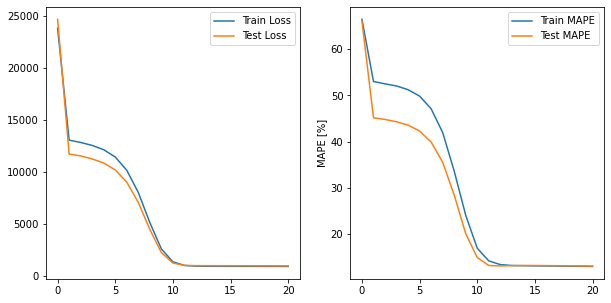

In [19]:
from sklearn.metrics import mean_absolute_percentage_error

model = NeuralNetwork().to(device)
optimizer = torch.optim.Adam(model.parameters())

train_loss_list = []
test_loss_list = []

train_mape_list = []
test_mape_list = []

# Train your model on the training data
for epoch in tqdm(range(1000)):
    y_pred = model(X_train)
    loss = F.mse_loss(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = F.mse_loss(y_test_pred, y_test)
            
            train_mape = 100 * mean_absolute_percentage_error(y_train.cpu().numpy(), y_pred.cpu().numpy())
            test_mape = 100 * mean_absolute_percentage_error(y_test.cpu().numpy(), y_test_pred.cpu().numpy())            
            
            train_loss_list.append(loss.item())
            test_loss_list.append(test_loss.item())

            train_mape_list.append(train_mape)
            test_mape_list.append(test_mape)
            
            
f = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.legend()
plt.subplot(122)
plt.plot(train_mape_list, label='Train MAPE')
plt.plot(test_mape_list, label='Test MAPE')
plt.ylabel('MAPE [%]')
plt.legend()


plt.show()          